# Lead Scoring Assignment / Case study

#### Problem Statement

 X Education gets a lot of leads, but its lead conversion rate is very poor. In order to make this process efficient the company need to identify most potential / "Hot Leads". The company needs to build a model which will help to identify most potential customers. 
 

This assignment / case study aims following goals:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

CEO recommended conversion rate as around 80%.

#### Steps to Perform:
    1) Read the problem statement / case study in detail
    2) Understand the data feeds along with dictionary
    3) Import libraries required for the data analysis and modeling
    4) Data Inspection / Data Quality checks / NULL inspection 
       & Data Cleaning 
           NULL / Outliers treatments
           Data specific treatments
               change "select" to null
           Greater then 40% can drop the columns
           Impute the columns which are having less then 40%
           outlier treatment
           Check unique values and we might have to do data treatment
           ID columns need to be dropped
    5) Exploratory data analysis (Univariate, Bivariate & Multivariate)
    6) Data preparation - 
           create dummies for categorical variables (get_dummies() in pd library). and drop the original columns
           perform train-test split (70% - 30%)
           perform scaling (minmax or standard)
    7) Modelling 
        Attribite / feature selction (RFE from 10 to 20)
        drop one by one with help of p-value < 0.05 /  vif < 5
        Model evaluation - recall - TP/TP+FN - how good the model in predicting +ve values. intention is to get all hot leads
        Find optimal cut-off by ROC curve. recall is maximum at optimal cut-off
        check model performance over test data (confusion matrix, sensitivity, F1-score and etc)
        score value - > probability * 100
    8) Prediction and evaluation metrics

#### Importing Libraries

In [296]:
#importing libraries useful for the data anaalysis, computation, plotting graphs and analyzing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [297]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [298]:
#Check the shape of the data frame
df.shape

(9240, 37)

#### Data Inspection (routine strcutured check):

In [299]:
#List of columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [300]:
#List of columns
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Data inspection  (Data Quality and missing values)

#### Data Cleaning process

###### Drop the id columns

In [169]:
# These are unique ids assigned to customer and leads and hence they will not add any value to our analsysis
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

###### Verify the categorical variables where we need specific data treatments

In [301]:
# Data verification for values in specific categorical variables:
# Following Attributes has values "Select" , which suggests that customer has not chosen any value. 
#     "Specialization", "How did you hear about X Educatio", "Lead Profile" and "city". 
# "Select" is default value which should be converted to NULL 

df=df.apply(lambda x: x.replace("Select" , np.nan))

##### NULL Value Treatment

In [302]:
# Checking null value % in data after replacing default values "Select" as NaN
df_nullcols =  round(100*(df.isnull().sum()/len(df.index)),2)
df_nullcols

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [304]:
#Get all the columns which has more then 40% (threshold) of NULL values 
missingcols_40 = df_nullcols[df_nullcols>40][:] #percentage 40 is kept as threshold
missingcols_40

How did you hear about X Education    78.46
Lead Quality                          51.59
Lead Profile                          74.19
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

In [305]:
# columns can be dropped which has more then threshold - 40% of values, which are null values
df_missingcols_40 = pd.DataFrame({'Columns': missingcols_40.index})
df.drop(df_missingcols_40.Columns,axis=1,inplace=True)

In [306]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [307]:
#Check the shape of data frame 
df.shape

(9240, 30)

In [308]:
# Post removal of NULL values rechecking which columns still have NULL values and should be treated/imputed where necessary
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

##### Null Value Treatment - Columns "TotalVisits" , "Page Views Per Visit" and "Last Activity"

In [309]:
#Verifying all dataframe values where TotalVistis are NULL
df[df.TotalVisits.isnull()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,895d4905-f534-4f18-915b-8d239a72b5dc,659722,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,...,No,No,No,NaN,No,No,NaN,No,No,Modified
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,No,No,1,NaN,705,NaN,...,No,No,No,Will revert after reading the email,No,No,Thane & Outskirts,No,No,Modified
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,659705,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,...,No,No,No,NaN,No,No,NaN,No,No,Modified
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,...,No,No,No,Closed by Horizzon,No,No,Mumbai,No,No,Modified
120,144807db-2895-4002-b52e-3eda79c22395,659283,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,...,No,No,No,Closed by Horizzon,No,No,Other Cities,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,82f3035c-0750-4f09-a0cc-4288abb88042,587973,Lead Add Form,Reference,No,No,0,NaN,1201,NaN,...,No,No,No,Interested in full time MBA,No,No,NaN,No,No,Modified
8107,7e66be45-783c-4983-b4cd-c6594bbbeee8,587916,Lead Add Form,Reference,No,No,1,NaN,903,NaN,...,No,No,No,Lost to EINS,No,No,NaN,No,No,Modified
8434,f5be8a84-bfa2-46a6-816a-af81a45ea6b9,585438,Lead Add Form,Reference,No,No,1,NaN,1458,NaN,...,No,No,No,Closed by Horizzon,No,No,NaN,No,No,Modified
9015,5857eeef-41cb-4523-a654-8709f6c8d8c6,581257,Lead Add Form,Reference,No,No,1,NaN,1159,NaN,...,No,No,No,Closed by Horizzon,No,No,Mumbai,No,No,Modified


In [310]:
# Columns ( "Lead Source", "TotalVisits" , "Page Views Per Visit" and "Last Activity")  having null values around 2% of total data points. 
# Also when value is NaN for TotalVisits, "Page Views Per Visit" column is also having NaN for those records. 
# Thus dropping records having very less null values

df.dropna(subset=["Lead Source","TotalVisits" , "Page Views Per Visit" , "Last Activity"] , inplace = True)
df.shape

(9074, 30)

##### Columns where data skewed will not help to give any insights; so worth excluding them for the analysis

In [311]:
# Checking values and their respective count in 'What matters most to you in choosing a course'
df["What matters most to you in choosing a course"].value_counts(normalize=True)

Better Career Prospects      0.999686
Flexibility & Convenience    0.000157
Other                        0.000157
Name: What matters most to you in choosing a course, dtype: float64

In [312]:
# dropping the column as data is skewed and will not provide any insights. almost all leads says "Better Career Prospects"
df.drop(columns=df[["What matters most to you in choosing a course"]] , inplace= True)
df.shape

(9074, 29)

##### Verify the value of country

In [313]:
#Verify the distribution of different country values
df["Country"].value_counts(normalize=True)

India                   0.957657
United States           0.010180
United Arab Emirates    0.007819
Singapore               0.003541
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [314]:
# Checking if country can be imputedfrom City. So verifying city where country is NULL
df[df.Country.isnull()].City.value_counts()

Mumbai                         167
Thane & Outskirts               73
Other Cities                    49
Other Cities of Maharashtra     32
Other Metro Cities              12
Tier II Cities                   2
Name: City, dtype: int64

In [315]:
#Checking NULL vaues in country column
df["Country"].isnull().sum()

2296

In [316]:
# Country can be imputed as India where city is Mumbai, Thane & Outskirts, Other Cities of Maharashtra
df.loc[(df.Country.isnull()) & (df.City.isin(['Mumbai','Thane & Outskirts','Other Cities of Maharashtra'])),['Country']]='India'

# Checking remaining null value count after imputation
df["Country"].isnull().sum()

2024

In [317]:
#Re-verifying the distribution of different country values
df["Country"].value_counts(normalize = True)

India                   0.959291
United States           0.009787
United Arab Emirates    0.007518
Singapore               0.003404
Saudi Arabia            0.002979
United Kingdom          0.002128
Australia               0.001844
Qatar                   0.001418
Hong Kong               0.000993
Bahrain                 0.000993
Oman                    0.000851
France                  0.000851
unknown                 0.000709
South Africa            0.000567
Nigeria                 0.000567
Germany                 0.000567
Kuwait                  0.000567
Canada                  0.000567
Sweden                  0.000426
China                   0.000284
Asia/Pacific Region     0.000284
Uganda                  0.000284
Bangladesh              0.000284
Italy                   0.000284
Belgium                 0.000284
Netherlands             0.000284
Ghana                   0.000284
Philippines             0.000284
Russia                  0.000142
Switzerland             0.000142
Vietnam   

In [318]:
# More then 95% people are from India, hence remaining 5 % can be clubbed in the title "Other Countries".
df["Country"]=df["Country"].apply(lambda cnt : "Other Countries" if cnt!= "India" else "India")
df["Country"].value_counts()

India              6763
Other Countries    2311
Name: Country, dtype: int64

##### NULL Value treatment for City

In [319]:
#X eductation is an online platform and almost close to 40% of values in city column has NULL values and henc we can drop the column
df.drop(columns=df[["City"]] , inplace= True)
df.shape

(9074, 28)

##### NULL Value treatment for Specialization column

In [320]:
# The column 'Specialiation' contains 36% null values and it is categorical in nature. 
# Thus we introduce a new category unknown.
df["Specialization"].fillna("Unknown" , inplace = True)
df["Specialization"].value_counts(normalize= True)

Unknown                              0.361693
Finance Management                   0.105687
Human Resource Management            0.092242
Marketing Management                 0.090699
Operations Management                0.054992
Business Administration              0.043972
IT Projects Management               0.040335
Supply Chain Management              0.038131
Banking, Investment And Insurance    0.036919
Travel and Tourism                   0.022261
Media and Advertising                0.022261
International Business               0.019396
Healthcare Management                0.017192
E-COMMERCE                           0.012233
Hospitality Management               0.012233
Retail Management                    0.011020
Rural and Agribusiness               0.008045
E-Business                           0.006282
Services Excellence                  0.004408
Name: Specialization, dtype: float64

##### NULL Value treatment for "What is your current occupation" column

In [321]:
# The column 'What is your current occupation' contains 29% null values and it is categorical in nature. 
# Thus we introduce a new category unknown.
df["What is your current occupation"].fillna("Unknown" , inplace = True)
df["What is your current occupation"].value_counts(normalize= True)

Unemployed              0.603482
Unknown                 0.295680
Working Professional    0.074609
Student                 0.022702
Other                   0.001653
Housewife               0.000992
Businessman             0.000882
Name: What is your current occupation, dtype: float64

In [322]:
# The column 'Tags' contains 36.67% null values and it is categorical in nature. 
# Thus we introduce a new category unknown.
df["Tags"].fillna("Unknown" , inplace = True)
df["Tags"].value_counts(normalize= True)

Unknown                                              0.366652
Will revert after reading the email                  0.222173
Ringing                                              0.130813
Interested in other courses                          0.056094
Already a student                                    0.051245
Closed by Horizzon                                   0.033172
switched off                                         0.026449
Busy                                                 0.020388
Lost to EINS                                         0.018955
Not doing further education                          0.015980
Interested  in full time MBA                         0.012784
Graduation in progress                               0.012233
invalid number                                       0.009147
Diploma holder (Not Eligible)                        0.006943
wrong number given                                   0.005180
opp hangup                                           0.003637
number n

##### Treatment for data imbalance - Check for all columns which have yes/no values

In [323]:
df[['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 
      'X Education Forums', 'Newspaper', 'Digital Advertisement',
      'Update me on Supply Chain Content','Get updates on DM Content',
      'Through Recommendations','Receive More Updates About Our Courses',
      'I agree to pay the amount through cheque','A free copy of Mastering The Interview']].apply(pd.Series.value_counts)

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Update me on Supply Chain Content,Get updates on DM Content,Through Recommendations,Receive More Updates About Our Courses,I agree to pay the amount through cheque,A free copy of Mastering The Interview
No,8358,9072,9060,9074.0,9072,9073,9073,9070,9074.0,9074.0,9067,9074.0,9074.0,6186
Yes,716,2,14,NaN,2,1,1,4,NaN,NaN,7,NaN,NaN,2888


In [324]:
# As We can observe that values in most of the columns are skewed, thus will not add value to the analysis for model building.
# Hence we will drop all above column ecxept 'Do Not Email' and 'A free copy of Mastering The Interview'.

df.drop(columns=(df[['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 
      'X Education Forums', 'Newspaper', 'Digital Advertisement',
      'Update me on Supply Chain Content','Get updates on DM Content',
     'Through Recommendations','Receive More Updates About Our Courses','I agree to pay the amount through cheque']]), inplace= True)

In [325]:
#Re-verifying the shape of dataframe
df.shape

(9074, 16)

In [326]:
#We can change value for remaining YES/NO columns to 1 or 0

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[['A free copy of Mastering The Interview','Do Not Email']] = df[['A free copy of Mastering The Interview','Do Not Email']].apply(binary_map)

##### Inspect "Lead Source" Column Values  

In [327]:
#Verifying distinct counts of "Lead Source" attribute
df["Lead Source"].value_counts(normalize=True)

Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Press_Release        0.000220
Social Media         0.000220
Live Chat            0.000220
youtubechannel       0.000110
testone              0.000110
Pay per Click Ads    0.000110
welearnblog_Home     0.000110
WeLearn              0.000110
blog                 0.000110
NC_EDM               0.000110
Name: Lead Source, dtype: float64

In [328]:
# As we can see, Lead_source column has around 21 levels. However, many of those are below 1%
# Hence grouping all such levels in common level as 'Other Source'
df["Lead Source"]=df["Lead Source"].replace(['Referral Sites','Facebook',
                                             'bing','google','Click2call','Press_Release','Social Media','Live Chat',
                                             'youtubechannel',   'testone','Pay per Click Ads','welearnblog_Home','WeLearn',
                                             'blog','NC_EDM'],"Other Source")

# Re-checking values count after substitution
df["Lead Source"].value_counts(normalize=True)

Google              0.316068
Direct Traffic      0.280251
Olark Chat          0.193189
Organic Search      0.127177
Reference           0.048821
Other Source        0.020278
Welingak Website    0.014216
Name: Lead Source, dtype: float64

##### Inspect "Lead Origin" Column Values

In [329]:
#Checking distinct values and their counts for "Lead Origin" column
df["Lead Origin"].value_counts(normalize=True)

Landing Page Submission    0.538351
API                        0.394313
Lead Add Form              0.064029
Lead Import                0.003306
Name: Lead Origin, dtype: float64

Categories for Lead Origin are very less and not much needed to add other categories here.

##### Checking variables "Last Activity" and "Last Notable Activity" columns

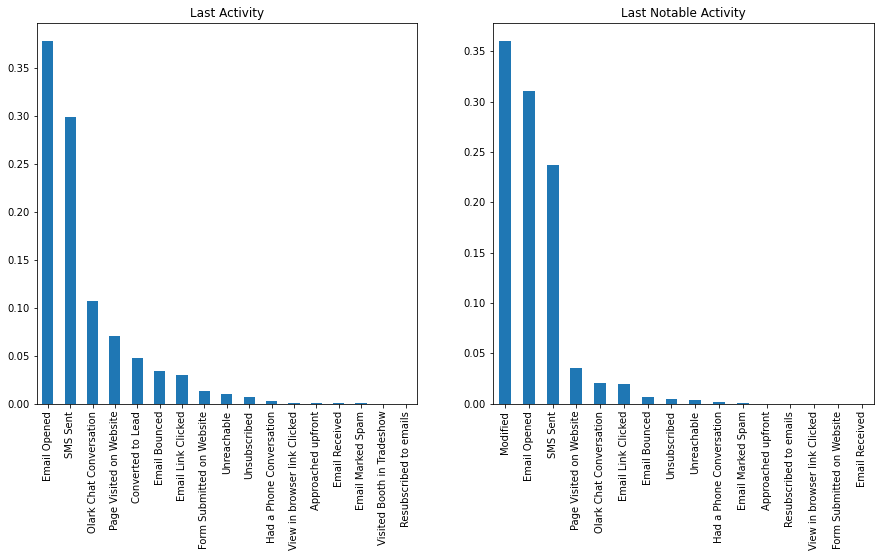

In [331]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Last Activity")
df['Last Activity'].value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
plt.title("Last Notable Activity")
df['Last Notable Activity'].value_counts(normalize = True).plot.bar()
plt.show()

Inference: Looks like these two attributes contains similar set of values so it would be worth keeping one of these columns. We will retain column "Last Notable Activity"

In [332]:
#dropping column "Last Activity" 
df.drop(["Last Activity"] , axis = 1, inplace=True)

##### Check values for "Last Notable Activity"

In [333]:
#Check distinct values for column "Last Notable Activity" 
df["Last Notable Activity"].value_counts(normalize=True)

Modified                        0.360040
Email Opened                    0.311109
SMS Sent                        0.237161
Page Visited on Website         0.035045
Olark Chat Conversation         0.020168
Email Link Clicked              0.019065
Email Bounced                   0.006612
Unsubscribed                    0.004959
Unreachable                     0.003527
Had a Phone Conversation        0.001543
Email Marked Spam               0.000220
Approached upfront              0.000110
Resubscribed to emails          0.000110
View in browser link Clicked    0.000110
Form Submitted on Website       0.000110
Email Received                  0.000110
Name: Last Notable Activity, dtype: float64

In [334]:
# Last Notable Activity column has 16 categories. Most of those are below 1%
# Hence grouping all such levels in common level as 'Other Last Notable Activity'
df["Last Notable Activity"]=df["Last Notable Activity"].replace([
"Email Bounced",
"Unsubscribed",
"Unreachable",
"Had a Phone Conversation",
"Email Marked Spam",
"Approached upfront",
"Resubscribed to emails",
"View in browser link Clicked",
"Form Submitted on Website",
"Email Received"],"Other Last Notable Activity")

df["Last Notable Activity"].value_counts(normalize=True)

Modified                       0.360040
Email Opened                   0.311109
SMS Sent                       0.237161
Page Visited on Website        0.035045
Olark Chat Conversation        0.020168
Email Link Clicked             0.019065
Other Last Notable Activity    0.017412
Name: Last Notable Activity, dtype: float64

##### Check Values for "Tag" Column

In [335]:
df["Tags"].value_counts(normalize= True)

Unknown                                              0.366652
Will revert after reading the email                  0.222173
Ringing                                              0.130813
Interested in other courses                          0.056094
Already a student                                    0.051245
Closed by Horizzon                                   0.033172
switched off                                         0.026449
Busy                                                 0.020388
Lost to EINS                                         0.018955
Not doing further education                          0.015980
Interested  in full time MBA                         0.012784
Graduation in progress                               0.012233
invalid number                                       0.009147
Diploma holder (Not Eligible)                        0.006943
wrong number given                                   0.005180
opp hangup                                           0.003637
number n

In [336]:
# Tag column has 27 categories. Most of those are below 1%. It has got almost 36% values which are unknown; 
# so any insight drawn from other categories are not much significant use. So dropping this column. 

#dropping column "Last Activity" 
df.drop(["Tags"] , axis = 1, inplace=True)
df.shape

(9074, 14)

In [337]:
#Verify the data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Other Countries,Unknown,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,India,Unknown,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,India,Business Administration,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,India,Unknown,Unemployed,0,Modified


##### Verify columns for outlier analysis for continuous variables

In [338]:
#Verifying the percentiles for continuous variables
df.describe()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.078907,0.378554,3.456028,482.887481,2.370151,0.318272
std,23348.029512,0.269608,0.485053,4.858802,545.256560,2.160871,0.465831
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000
50%,615278.500000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000
75%,637176.500000,0.000000,1.000000,5.000000,922.750000,3.200000,1.000000
max,660737.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000


##### Verify following columns for outlier treatment:
- TotalVisits, 
- Total Time Spent on Website, 
- Page Views Per Visit

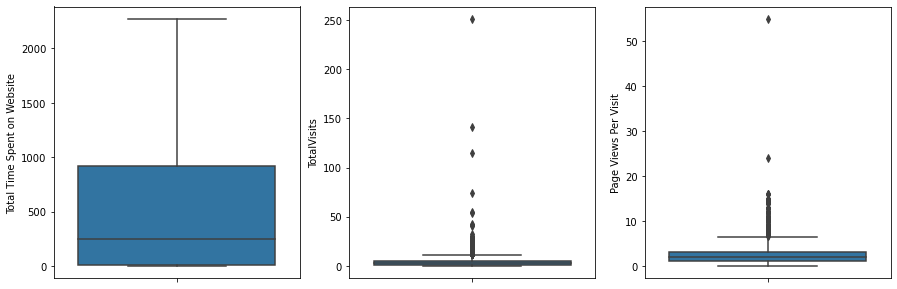

In [339]:
# Box plot for "TotalVisits", "Total Time Spent on Website" and "Page Views Per Visit" columns
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(y=df["Total Time Spent on Website"])
plt.subplot(1,3,2)
sns.boxplot(y=df["TotalVisits"])
plt.subplot(1,3,3)
sns.boxplot(y=df["Page Views Per Visit"])
plt.show()

##### As we observe following two columns has outliers:
    - Total Visits,
    - Page Views Per Visit

In [340]:
# Coverting TotalVisits column to Int
df.TotalVisits = df.TotalVisits.astype('Int64')

# Quantile values for TotalVisits column:
df.TotalVisits.quantile([0.5,0.95,0.99,1])


0.50      3
0.95     10
0.99     17
1.00    251
Name: TotalVisits, dtype: Int64

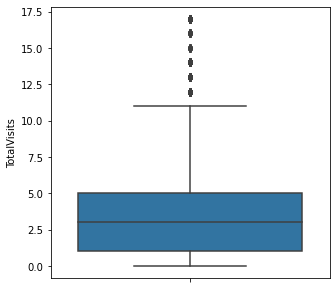

In [341]:
# Outlier Treatments:

# TotalVisits column - 99 percentile lies at 17, while we have values as high as 251 present in the data. 
# Thus to treat outliers of this column we cap the values to 99 percentile.
q_99 = int(df.TotalVisits.quantile(0.99))
df.TotalVisits = df.TotalVisits.apply(lambda x : q_99 if x > q_99 else x)

# Box plot for TotalVisits column after outlier treatment 
plt.figure(figsize=(5,5))
sns.boxplot(y=df["TotalVisits"])
plt.show()

In [342]:
# Quantile values for TotalVisits column:
df["Page Views Per Visit"].quantile([0.5,0.95,0.99,1])


0.50     2.0
0.95     6.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

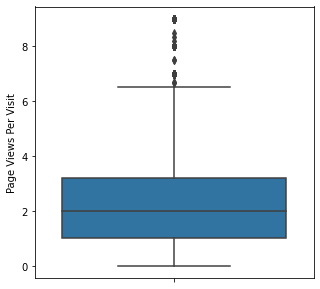

In [343]:
# "Page Views Per Visit"'" column - 99 percentile value is 9.0, where as we have 55 present in the data. 
# We are capping to 99 percentile value for treating the outlier.
qp_99 = int(df['Page Views Per Visit'].quantile(0.99))
df['Page Views Per Visit'] = df['Page Views Per Visit'].apply(lambda x : qp_99 if x > qp_99 else x)

# Box plot for TotalVisits column after outlier treatment 
plt.figure(figsize=(5,5))
sns.boxplot(y=df["Page Views Per Visit"])
plt.show()

##### Exploratory Data Analysis

In [344]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0,0.0,Other Countries,Unknown,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5,674,2.5,India,Unknown,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,India,Business Administration,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,India,Media and Advertising,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2,1428,1.0,India,Unknown,Unemployed,0,Modified


In [348]:
def plotUnivariateCountPlot(col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.countplot(col, data=df[df["Converted"]==1])
    plt.title('Distribution - Converted leads for ' + col)
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.subplot(1,2,2)
    sns.countplot(col, data=df[df["Converted"]==0])
    plt.title('Distribution - non-Converted leads for ' + col)
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.show()

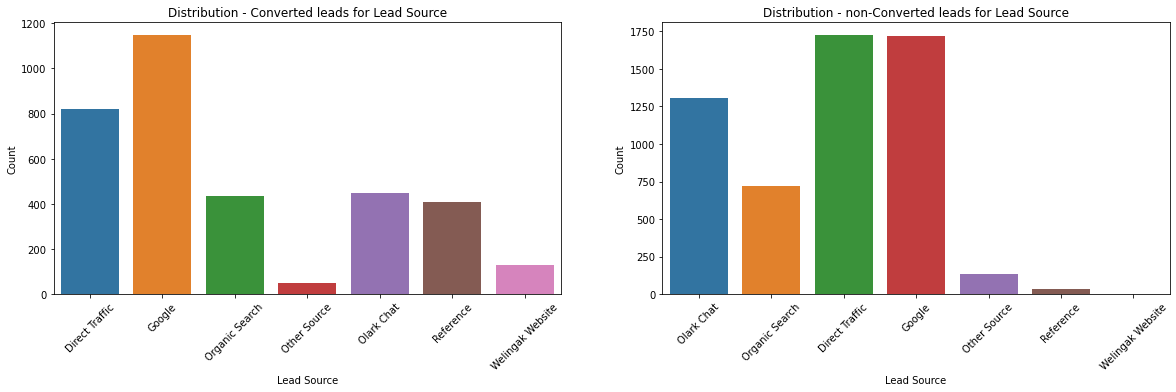

In [350]:
#Check univariate distribution for Lead Source field
plotUnivariateCountPlot('Lead Source')

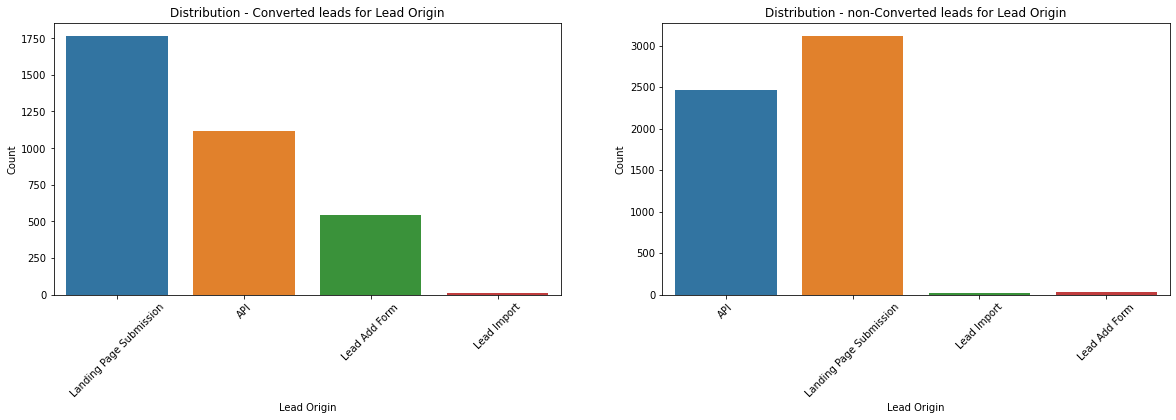

In [351]:
#Check univariate distribution for Lead Origin field
plotUnivariateCountPlot('Lead Origin')

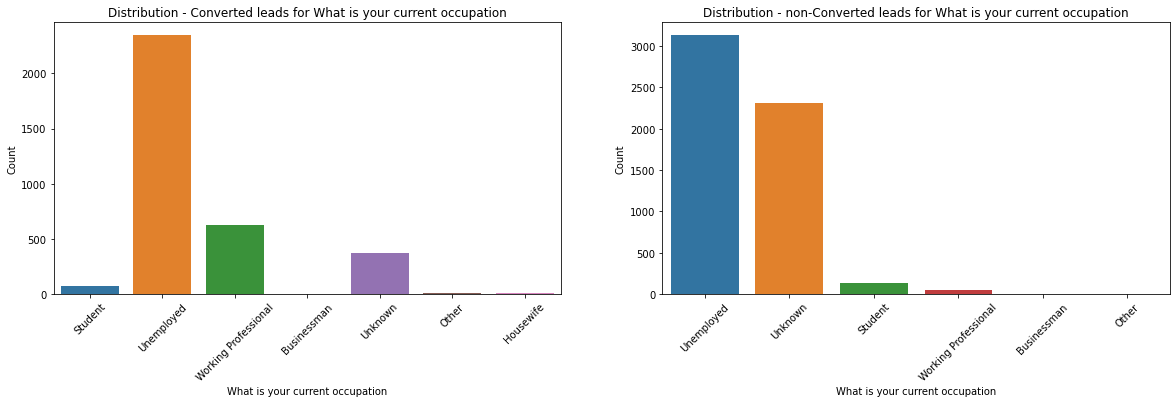

In [354]:
#Check univariate distribution for Lead Origin field
plotUnivariateCountPlot('What is your current occupation')

In [361]:
df1 = df[df["Converted"]==1]
df0 = df[df["Converted"]==0]
def plotUnivariateDistPlot(col):
    sns.distplot(df1[col],label='Converted',hist=False)
    sns.distplot(df0[col],label='Non-Converted',hist=False)
    plt.legend()
    plt.show()

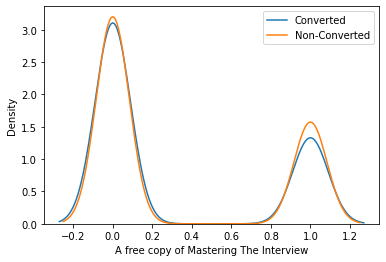

In [364]:
#Checking the effect of providing free copy of "mastering interview"
plotUnivariateDistPlot('A free copy of Mastering The Interview')

Inference: No much impact seen for those leaads who wants a free copy of Mastering The Interview or not.

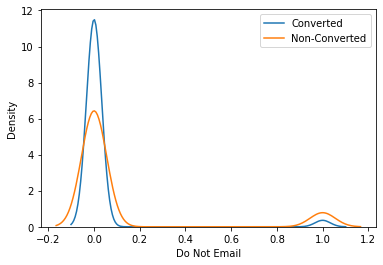

In [367]:
#Check comparision of leads who mentioned not to email
plotUnivariateDistPlot('Do Not Email')

Inference: Most of the leads converted has not mentioned to stop the email

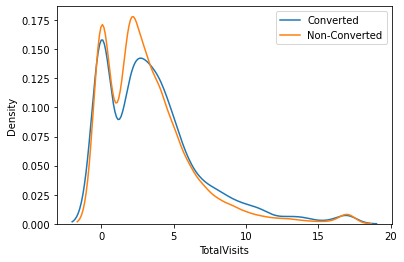

In [368]:
#Verify TotalVisits impact on conversion
plotUnivariateDistPlot('TotalVisits')

In case of less total visits non-conversion are higher. In caseof more visits conversions are seen.

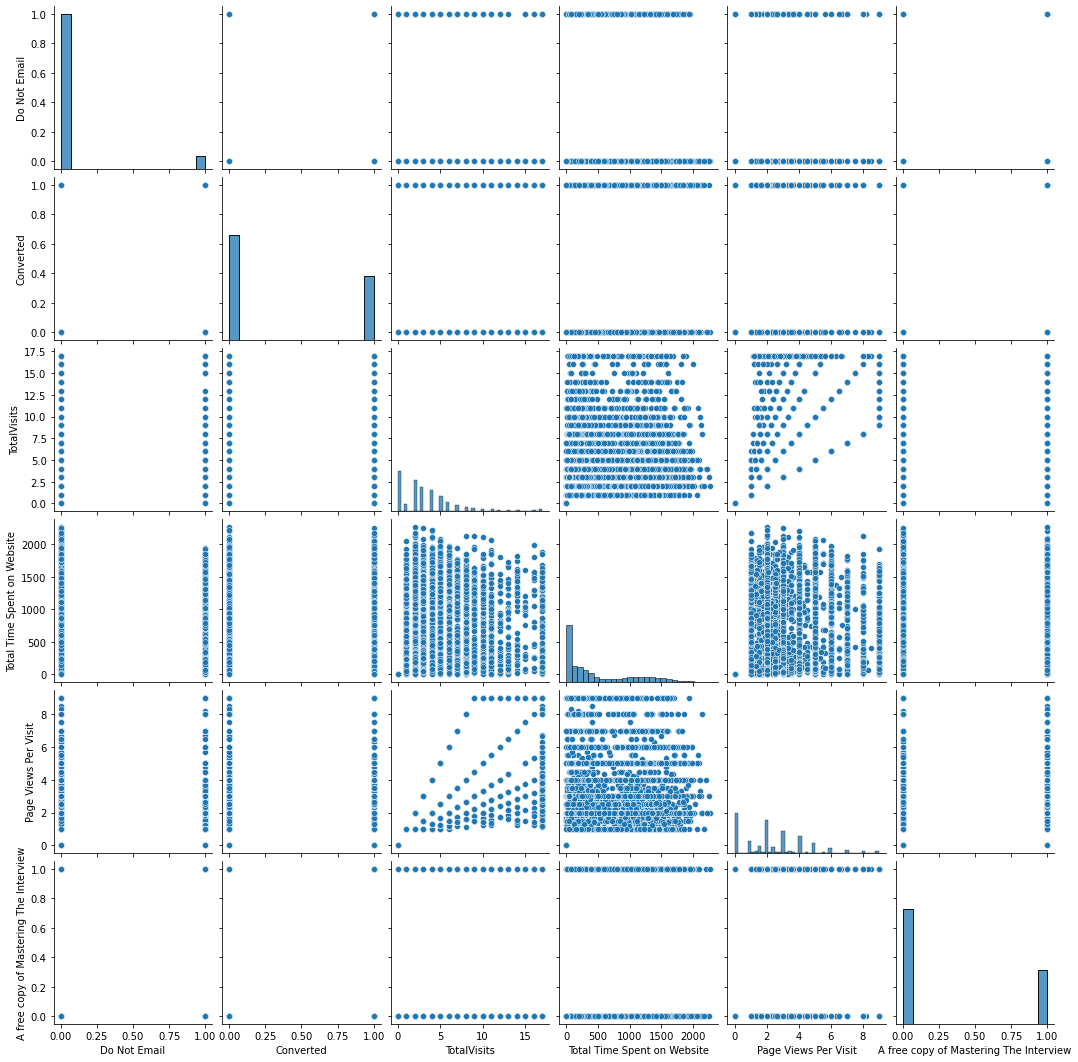

In [211]:
#Visualizing numerical variables using pairplot
sns.pairplot(data=df)
plt.show()

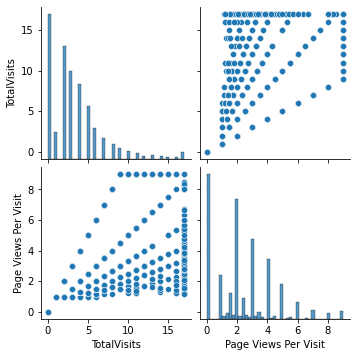

In [295]:
sns.pairplot(data=df[['TotalVisits','Page Views Per Visit']])
plt.show()

<B>Inference</B>:By looking at this pairplot it is evident that columns like "TotalVisits" and "Page Views per visit" are positively correletated 

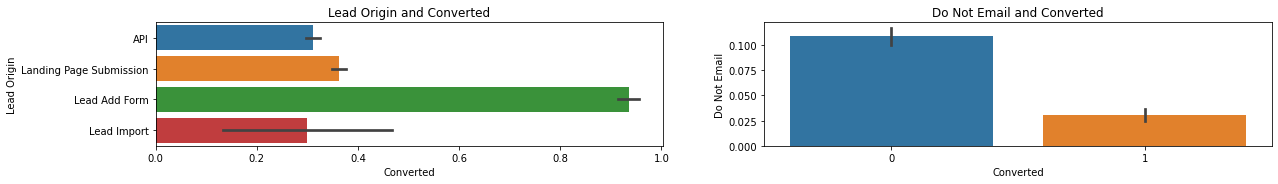

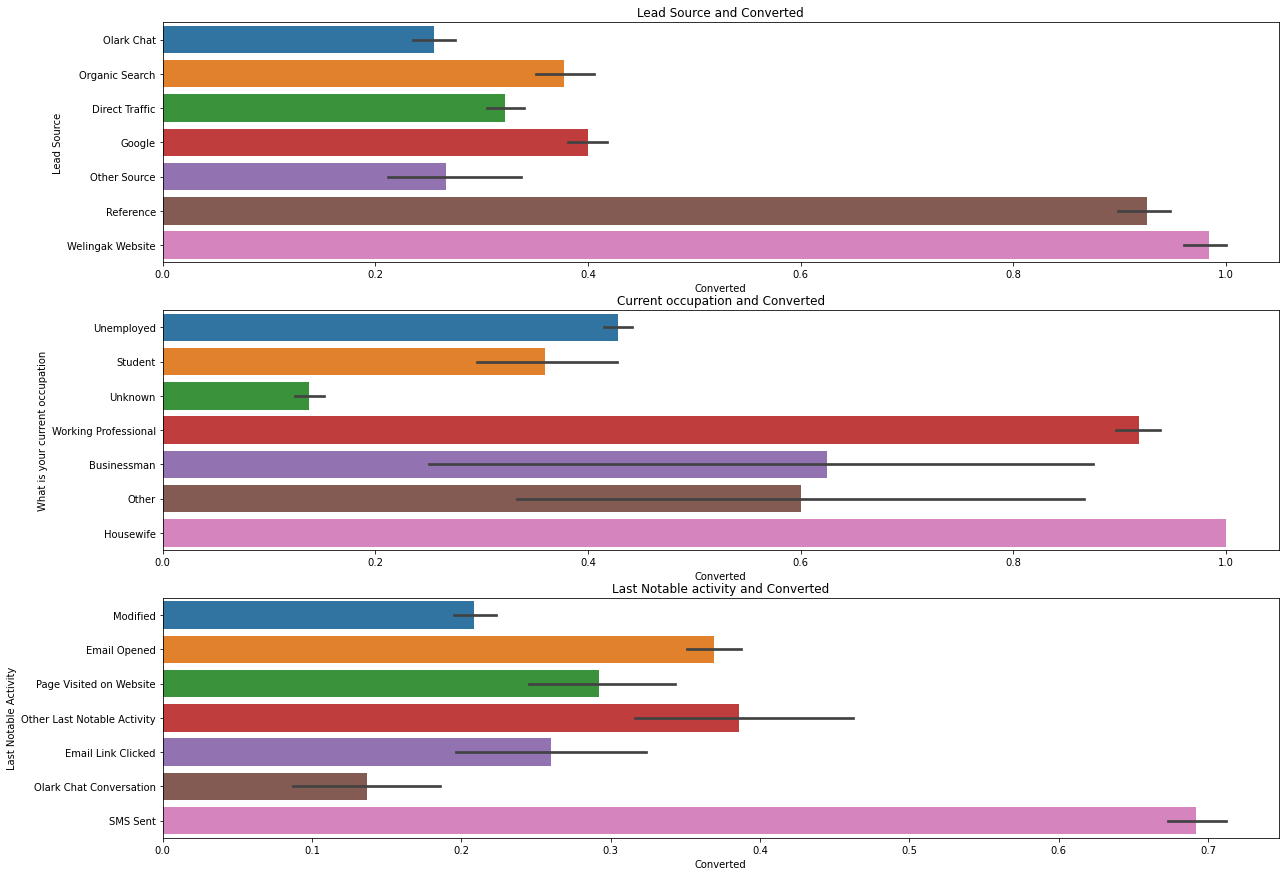

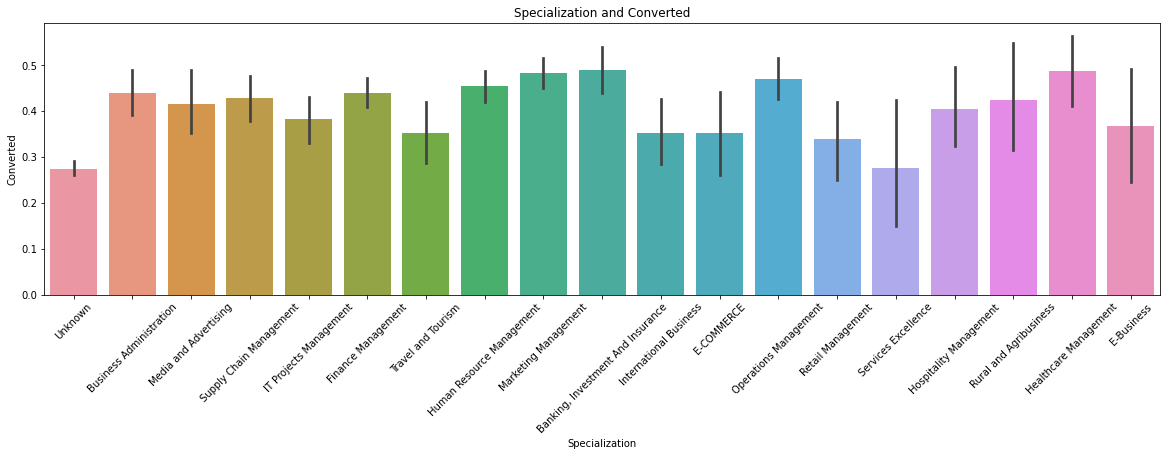

In [212]:
# visualizing impact of categorical varials on conversion of customers

plt.figure(figsize=(20, 5))
plt.subplot(2,2,1)
plt.title("Lead Origin and Converted")
sns.barplot(y='Lead Origin', x='Converted', data = df)
plt.subplot(2,2,2)
plt.title("Do Not Email and Converted")
sns.barplot(y='Do Not Email',x='Converted', data = df)
plt.show()

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.title("Lead Source and Converted")
sns.barplot(y='Lead Source', x='Converted', data = df)
plt.subplot(3,1,2)
plt.title("Current occupation and Converted")
sns.barplot(y='What is your current occupation', x='Converted', data = df)
plt.subplot(3,1,3)
plt.title("Last Notable activity and Converted")
sns.barplot(y='Last Notable Activity', x='Converted', data = df)
plt.show()

plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
plt.title("Specialization and Converted")
sns.barplot(x='Specialization', y='Converted', data = df)
plt.show()

<B>Inference : </B>
Followingare the insights:
  -  Lead origin with 'Lead add form' shows high chances of customer being converted.
  -  Customers who have marked option for 'Do not Email' as yes, will mostly likely will not be conveted as paying customer
  -  Customer lead sources of Reference and Welingak Website are high indicators of customer being successfully converted. Where as those sourced via olak charts and direct traffic are not promising leads.
  -  Working profressionals and housewife categories are potential lead and most likely to be converted. While those customers who have not provided current occupation details are not likely to be converted.
  -  Customers with last notable activity of Modified or Olark Chat conversion show negative impact of conversion.
  -  Customer's specialization category does not indicate any significant variation in impact on conversion. Little more conversion seen with specialization Marketing, human resourcemanagement, operations management, rural and agribusiness

<B>Data preparation </B>
    - Dummy variable creation:

In [214]:
# Create dummies 'Lead_Origin' column
dummy_lead_origin =pd.get_dummies(df["Lead Origin"], prefix= "Lead_Origin") # get dummy columns

df_dummy_lead_origin=dummy_lead_origin.drop(["Lead_Origin_Lead Import"] , 1)  # Dropping 1 column as redundant information
df=pd.concat([df,df_dummy_lead_origin], axis = 1)  # Adding dummy columns to main dataframe
df=df.drop(["Lead Origin"], axis = 1) # dropping original column after dummy creation 
df.head()

,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form
0,Olark Chat,0,0,0,0,0.0,Other Countries,Unknown,Unemployed,0,Modified,1,0,0
1,Organic Search,0,0,5,674,2.5,India,Unknown,Unemployed,0,Email Opened,1,0,0
2,Direct Traffic,0,1,2,1532,2.0,India,Business Administration,Student,1,Email Opened,0,1,0
3,Direct Traffic,0,0,1,305,1.0,India,Media and Advertising,Unemployed,0,Modified,0,1,0
4,Google,0,1,2,1428,1.0,India,Unknown,Unemployed,0,Modified,0,1,0


In [215]:
# Create dummies for 'Lead Source' column
dummy_lead_source = pd.get_dummies(df["Lead Source"], prefix= "Lead_Source") # get dummy columns
df_dummy_lead_source = dummy_lead_source.drop(["Lead_Source_Other Source"] , 1) # Dropping 1 column as redundant information
df=pd.concat([df,df_dummy_lead_source], axis = 1) # Adding dummy columns to main dataframe
df=df.drop(["Lead Source"], axis = 1) # dropping original column after dummy creation 
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Welingak Website
0,0,0,0,0,0.0,Other Countries,Unknown,Unemployed,0,Modified,1,0,0,0,0,1,0,0,0
1,0,0,5,674,2.5,India,Unknown,Unemployed,0,Email Opened,1,0,0,0,0,0,1,0,0
2,0,1,2,1532,2.0,India,Business Administration,Student,1,Email Opened,0,1,0,1,0,0,0,0,0
3,0,0,1,305,1.0,India,Media and Advertising,Unemployed,0,Modified,0,1,0,1,0,0,0,0,0
4,0,1,2,1428,1.0,India,Unknown,Unemployed,0,Modified,0,1,0,0,1,0,0,0,0


In [216]:
# Create dummies for 'Country' column
dummy_country=pd.get_dummies(df["Country"], prefix= "Country") # get dummy columns
df_dummy_country=dummy_country.drop(["Country_Other Countries"] , 1)  # Dropping 1 column as redundant information
df=pd.concat([df,df_dummy_country], axis = 1)  # Adding dummy columns to main dataframe
df=df.drop(["Country"], axis = 1) # dropping original column after dummy creation
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Welingak Website,Country_India
0,0,0,0,0,0.0,Unknown,Unemployed,0,Modified,1,0,0,0,0,1,0,0,0,0
1,0,0,5,674,2.5,Unknown,Unemployed,0,Email Opened,1,0,0,0,0,0,1,0,0,1
2,0,1,2,1532,2.0,Business Administration,Student,1,Email Opened,0,1,0,1,0,0,0,0,0,1
3,0,0,1,305,1.0,Media and Advertising,Unemployed,0,Modified,0,1,0,1,0,0,0,0,0,1
4,0,1,2,1428,1.0,Unknown,Unemployed,0,Modified,0,1,0,0,1,0,0,0,0,1


In [218]:
# Create dummies for 'Specialization' column
dummy_specialization=pd.get_dummies(df["Specialization"], prefix= "Specialization") # get dummy columns
df_dummy_specialization=dummy_specialization.drop(["Specialization_Services Excellence"] , 1)  # Dropping 1 column as redundant information
df=pd.concat([df,df_dummy_specialization], axis = 1)  # Adding dummy columns to main dataframe
df=df.drop(["Specialization"], axis = 1) # dropping original column after dummy creation
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead_Origin_API,Lead_Origin_Landing Page Submission,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown
0,0,0,0,0,0.0,Unemployed,0,Modified,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,5,674,2.5,Unemployed,0,Email Opened,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,2,1532,2.0,Student,1,Email Opened,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,305,1.0,Unemployed,0,Modified,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2,1428,1.0,Unemployed,0,Modified,0,1,...,0,0,0,0,0,0,0,0,0,1


In [219]:
# Create dummies for 'What is your current occupation' column
dummy_occupation=pd.get_dummies(df["What is your current occupation"], prefix= "Occupation") # get dummy columns
df_dummy_occupation=dummy_occupation.drop(["Occupation_Other"] , 1) # Dropping redundant column
df=pd.concat([df,df_dummy_occupation], axis = 1)  # Adding dummy attributes to main dataframe
df=df.drop(["What is your current occupation"], axis = 1) # dropping original column posy dummy attributes creation
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,...,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
0,0,0,0,0,0.0,0,Modified,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,5,674,2.5,0,Email Opened,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,1,2,1532,2.0,1,Email Opened,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,305,1.0,0,Modified,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,2,1428,1.0,0,Modified,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [221]:
# Create dummies for 'Last Notable Activity' column
dummy_last_Ntbl_activity =pd.get_dummies(df["Last Notable Activity"], prefix= "Last_Ntbl_Activity") # get dummy columns
df_dummy_last_Ntbl_activity=dummy_last_Ntbl_activity.drop(["Last_Ntbl_Activity_Other Last Notable Activity"] , 1) # Dropping 1 column as redundant information
df=pd.concat([df,df_dummy_last_Ntbl_activity], axis = 1) # Adding dummy columns to main dataframe
df=df.drop(["Last Notable Activity"], axis = 1) # dropping original column after dummy creation
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Direct Traffic,...,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional,Last_Ntbl_Activity_Email Link Clicked,Last_Ntbl_Activity_Email Opened,Last_Ntbl_Activity_Modified,Last_Ntbl_Activity_Olark Chat Conversation,Last_Ntbl_Activity_Page Visited on Website,Last_Ntbl_Activity_SMS Sent
0,0,0,0,0,0.0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,5,674,2.5,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,1,2,1532,2.0,1,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,1,305,1.0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
4,0,1,2,1428,1.0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


##### Looking for Correlations via heatmap

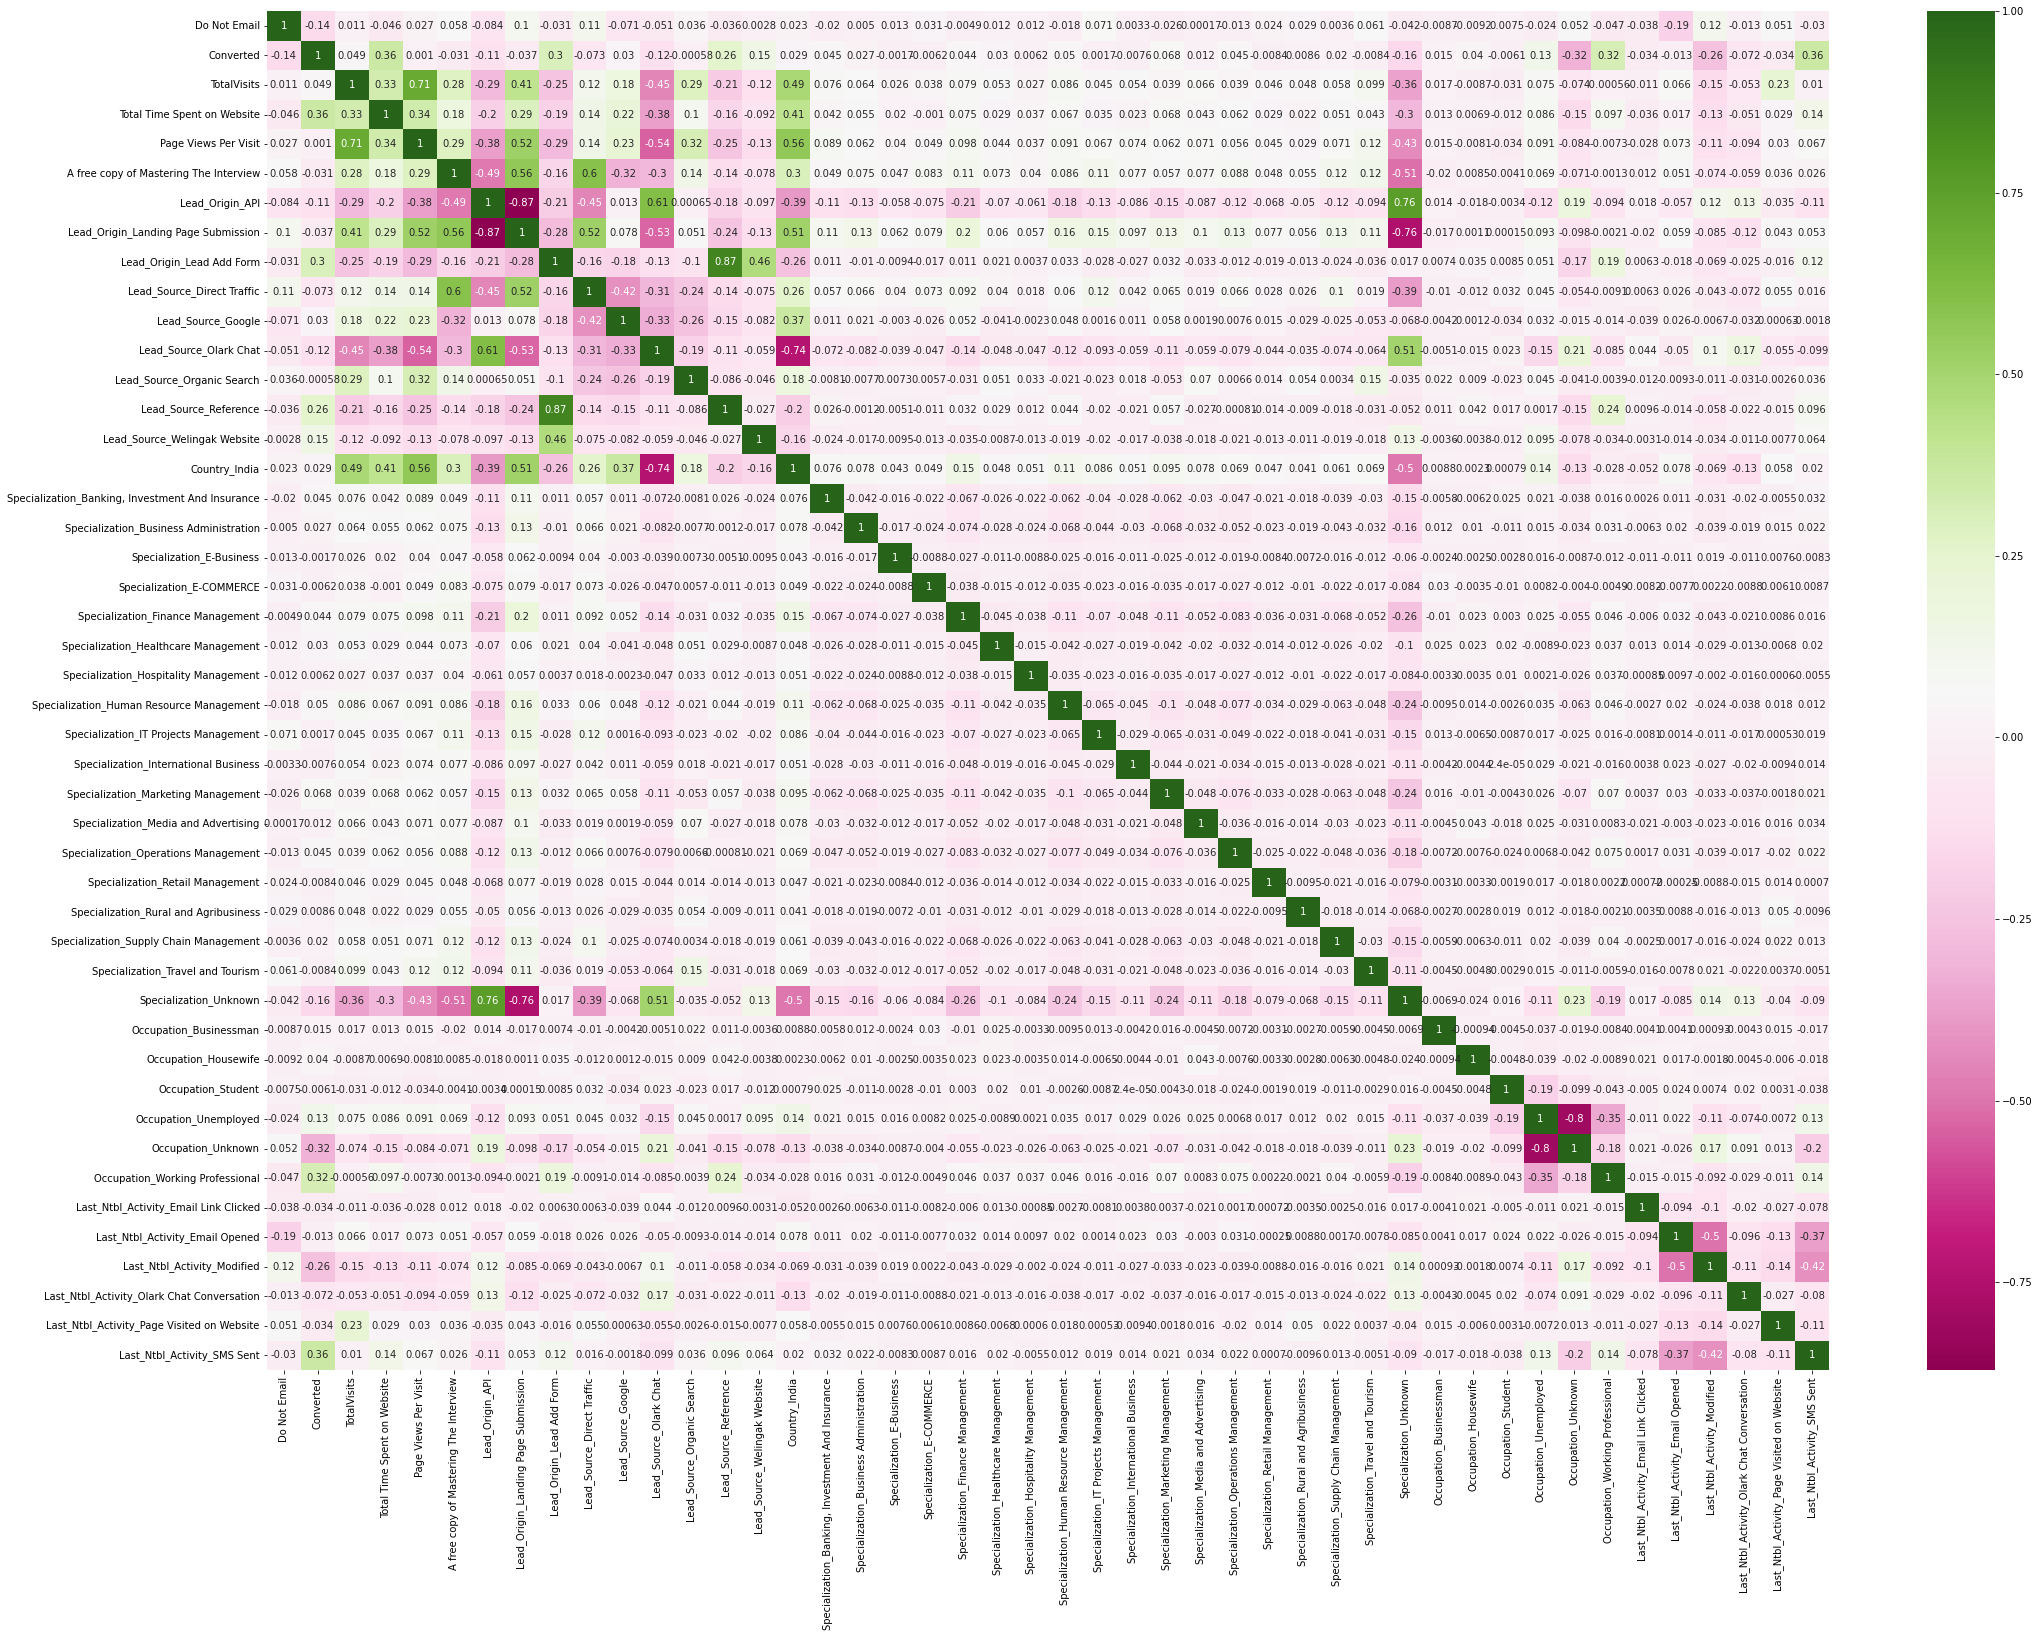

In [226]:
# Analyzing correlation matrix 
plt.figure(figsize = (35,25)) # Size of the map
colormap = sns.color_palette("Greens")
sns.heatmap(df.corr(),annot = True,cmap="PiYG")

plt.show()

<B>Inference : </B>
High correlaton is observed between - 
1. 'Lead Source Reference' & 'Lead_Origin_Lead Add Form' of 0.85
2. 'Lead_Origin API' & 'Lead_Origin_Landing Page submission' of -0.87
3. 'Specialization_Unknown' & 'Lead Origin Landing Page Submission' of -0.76
4. 'Country_India' & 'Lead_Source_Olak_Chart' of -0.74
5. 'Page Views per visit' & 'TotalVisits' of 0.71

For now we are not dropping these columns. 

<B>Perform train-test split (70% - 30%) </B>

In [227]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [228]:
# Putting feature independent variables in X 
X=df.drop(["Converted"] , axis = 1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Direct Traffic,Lead_Source_Google,...,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional,Last_Ntbl_Activity_Email Link Clicked,Last_Ntbl_Activity_Email Opened,Last_Ntbl_Activity_Modified,Last_Ntbl_Activity_Olark Chat Conversation,Last_Ntbl_Activity_Page Visited on Website,Last_Ntbl_Activity_SMS Sent
0,0,0,0,0.0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,5,674,2.5,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,2,1532,2.0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,0,1,305,1.0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,0,2,1428,1.0,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [229]:
# Putting response target variable to y
y=df["Converted"]

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [230]:
# Splitting the data into train and test
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


##### Perform scaling (minmax ) for relevant attributes

In [231]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns. Exclude the columns derived from 'yes-no' and 'dummy' variables
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Direct Traffic,Lead_Source_Google,...,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional,Last_Ntbl_Activity_Email Link Clicked,Last_Ntbl_Activity_Email Opened,Last_Ntbl_Activity_Modified,Last_Ntbl_Activity_Olark Chat Conversation,Last_Ntbl_Activity_Page Visited on Website,Last_Ntbl_Activity_SMS Sent
3009,0,0.117647,0.178347,0.222222,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1012,1,0.117647,0.085355,0.222222,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9226,0,0.000000,0.000000,0.000000,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4750,0,0.117647,0.619946,0.222222,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
7987,0,0.294118,0.711590,0.277778,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [232]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Direct Traffic,Lead_Source_Google,...,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional,Last_Ntbl_Activity_Email Link Clicked,Last_Ntbl_Activity_Email Opened,Last_Ntbl_Activity_Modified,Last_Ntbl_Activity_Olark Chat Conversation,Last_Ntbl_Activity_Page Visited on Website,Last_Ntbl_Activity_SMS Sent
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.078885,0.197171,0.217585,0.261393,0.315383,0.391592,0.535979,0.068651,0.278066,0.320107,...,0.022201,0.605574,0.292710,0.075894,0.018422,0.305464,0.359471,0.019052,0.034483,0.244371
std,0.269581,0.190612,0.244868,0.220952,0.464705,0.488145,0.498743,0.252879,0.448082,0.466554,...,0.147349,0.488766,0.455042,0.264849,0.134483,0.460640,0.479883,0.136719,0.182480,0.429747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.058824,0.004492,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.176471,0.110961,0.222222,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.294118,0.413522,0.370000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [233]:
# checking actual conversion rate 
converted=(sum(df["Converted"])/len(df["Converted"].index))*100
converted

37.85541106458012

So actual conversion rate is 37.855

##### Modelling

In [234]:
import statsmodels.api as sm

In [235]:
# Logistics Regression model
logmod1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logmod1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           45
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2512.7
Date:                Sat, 21 Jan 2023   Deviance:                       5025.4
Time:                        19:11:30   Pearson chi2:                 6.26e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4183
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.4233      1.196      1.190      0.234      -0.920       3.767
Do Not Email                                        -1.7847      0.203     -8.781      0.000      -2.183      -1.386
TotalVisits                                          1.4477      0.272      5.319      0.000       0.914       1.981
Total Time Spent on Website                          4.5946      0.172     26.727      0.000       4.258       4.931
Page Views Per Visit                                -1.0786      0.266     -4.056      0.000      -1.600      -0.557
A free copy of Mastering The Interview              -0.2045      0.111     -1.835      0.067      -0.423       0.014
Lead_Origin_API                                     -1.0315      0.568     -1.817      0.069      -2.144       0.081
Lead_Origin_Landing Page Submission                 -1.7738      0.571     -3.107      0.002      -2.893      -0.655
Lead_Origin_Lead Add Form                            0.4368      1.016      0.430      0.667      -1.555       2.429
Lead_Source_Direct Traffic                          -0.1258      0.319     -0.394      0.694      -0.752       0.500
Lead_Source_Google                                   0.1429      0.310      0.461      0.645      -0.464       0.750
Lead_Source_Olark Chat                               1.2095      0.350      3.453      0.001       0.523       1.896
Lead_Source_Organic Search                          -0.0191      0.319     -0.060      0.952      -0.644       0.606
Lead_Source_Reference                                1.9396      0.930      2.085      0.037       0.116       3.763
Lead_Source_Welingak Website                         4.4685      1.166      3.834      0.000       2.184       6.753
Country_India                                        0.0050      0.160      0.031      0.975      -0.309       0.319
Specialization_Banking, Investment And Insurance     0.5927      0.720      0.823      0.411      -0.819       2.004
Specialization_Business Administration               0.3168      0.719      0.440      0.660      -1.093       1.727
Specialization_E-Business                            0.8486      0.816      1.039      0.299      -0.751       2.449
Specialization_E-COMMERCE                            0.6261      0.771      0.813      0.416      -0.884       2.136
Specialization_Finance Management                    0.4256      0.706      0.603      0.547      -0.959       1.810
Specialization_Healthcare Management                 0.3941      0.746      0.528      0.597      -1.068       1.856
Specialization_Hospitality Management               -0.1081      0.771     -0.140      0.888      -1.619       1.403
Specialization_Human Resource Management 

##### Feature selection using RFE method (Most relevant 13 features)

In [239]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [240]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=13) # Selecting top 13 features
rfe = rfe.fit(X_train, y_train)

In [241]:
#Check which support_ in RFE object
rfe.support_

array([ True, False,  True, False, False, False, False,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True, False])

In [242]:
#Check ranking of relevant columns supported
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('A free copy of Mastering The Interview', False, 13),
 ('Lead_Origin_API', False, 6),
 ('Lead_Origin_Landing Page Submission', False, 2),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Source_Direct Traffic', False, 16),
 ('Lead_Source_Google', False, 25),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 20),
 ('Lead_Source_Reference', False, 7),
 ('Lead_Source_Welingak Website', True, 1),
 ('Country_India', False, 30),
 ('Specialization_Banking, Investment And Insurance', False, 17),
 ('Specialization_Business Administration', False, 31),
 ('Specialization_E-Business', False, 12),
 ('Specialization_E-COMMERCE', False, 19),
 ('Specialization_Finance Management', False, 24),
 ('Specialization_Healthcare Management', False, 26),
 ('Specialization_Hospitality Management', False, 11),
 ('Specialization_Human Resource Managem

In [245]:
# Extract list of most relevantcolumns as per RFE for response variable 
col = X_train.columns[rfe.support_]
print(col)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat',
       'Lead_Source_Welingak Website', 'Occupation_Housewife',
       'Occupation_Unknown', 'Occupation_Working Professional',
       'Last_Ntbl_Activity_Email Link Clicked',
       'Last_Ntbl_Activity_Email Opened', 'Last_Ntbl_Activity_Modified',
       'Last_Ntbl_Activity_Olark Chat Conversation',
       'Last_Ntbl_Activity_Page Visited on Website'],
      dtype='object')


##### Model 1 (RFE) - verify statistical significance and VIF

In [246]:
X_train_sm = sm.add_constant(X_train[col])
logmod1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = logmod1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2582.1
Date:                Sat, 21 Jan 2023   Deviance:                       5164.2
Time:                        19:26:58   Pearson chi2:                 6.29e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4054
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.6070      0.084     -7.261      0.000      -0.771      -0.443
Do Not Email                                  -1.8600      0.180    -10.351      0.000      -2.212      -1.508
Total Time Spent on Website                    4.6407      0.168     27.678      0.000       4.312       4.969
Lead_Origin_Lead Add Form                      3.7477      0.223     16.819      0.000       3.311       4.184
Lead_Source_Olark Chat                         1.2438      0.104     12.017      0.000       1.041       1.447
Lead_Source_Welingak Website                   2.1121      0.760      2.779      0.005       0.622       3.602
Occupation_Housewife                          22.5499   1.59e+04      0.001      0.999   -3.11e+04    3.12e+04
Occupation_Unknown                            -1.1732      0.088    -13.261      0.000      -1.347      -1.000
Occupation_Working Professional                2.4532      0.187     13.136      0.000       2.087       2.819
Last_Ntbl_Activity_Email Link Clicked         -1.7172      0.261     -6.572      0.000      -2.229      -1.205
Last_Ntbl_Activity_Email Opened               -1.3147      0.089    -14.713      0.000      -1.490      -1.140
Last_Ntbl_Activity_Modified                   -1.9709      0.093    -21.121      0.000      -2.154      -1.788
Last_Ntbl_Activity_Olark Chat Conversation    -2.5022      0.333     -7.525      0.000      -3.154      -1.850
Last_Ntbl_Activity_Page Visited on Website    -1.5785      0.207     -7.637      0.000      -1.984      -1.173
==============================================================================================================
"""

<B>Observation: </B>
    - p_value for Occupation_Housewife is more then 5% hence need to remove these column. Priorto removing this column lets review the distinct values

In [247]:
# Verifying distinct values for profession house-wife
X_train.Occupation_Housewife.value_counts()

0    6344
1       7
Name: Occupation_Housewife, dtype: int64

##### <B>Inference: </B>
    - p_value for Occupation_Housewife is more then 5% hence this attribute is not statistically significant
    - As per EDA done earlier house sife occupation show positive impact however by looking at distinct values this represents population with very smaller percentage
    

##### Model 2 - Dropping Occupation_Housewife column

In [249]:
col = col.drop('Occupation_Housewife',1)

X_train_2 = sm.add_constant(X_train[col])
logmod2 = sm.GLM(y_train,X_train_2, family = sm.families.Binomial())
res2 = logmod2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2586.0
Date:                Sat, 21 Jan 2023   Deviance:                       5172.0
Time:                        19:38:11   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4047
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.6057      0.084     -7.248      0.000      -0.770      -0.442
Do Not Email                                  -1.8609      0.180    -10.353      0.000      -2.213      -1.509
Total Time Spent on Website                    4.6390      0.167     27.696      0.000       4.311       4.967
Lead_Origin_Lead Add Form                      3.7675      0.223     16.932      0.000       3.331       4.204
Lead_Source_Olark Chat                         1.2406      0.103     11.993      0.000       1.038       1.443
Lead_Source_Welingak Website                   2.0888      0.760      2.748      0.006       0.599       3.579
Occupation_Unknown                            -1.1761      0.088    -13.297      0.000      -1.349      -1.003
Occupation_Working Professional                2.4486      0.187     13.110      0.000       2.082       2.815
Last_Ntbl_Activity_Email Link Clicked         -1.7050      0.260     -6.564      0.000      -2.214      -1.196
Last_Ntbl_Activity_Email Opened               -1.3078      0.089    -14.648      0.000      -1.483      -1.133
Last_Ntbl_Activity_Modified                   -1.9698      0.093    -21.111      0.000      -2.153      -1.787
Last_Ntbl_Activity_Olark Chat Conversation    -2.4999      0.333     -7.518      0.000      -3.152      -1.848
Last_Ntbl_Activity_Page Visited on Website    -1.5780      0.207     -7.635      0.000      -1.983      -1.173
==============================================================================================================
"""

Looking at p-values all remaining columns seems to be statistically significant. Lets look at Variance inflation factor value

##### Checking VIF

In [250]:
vif = pd.DataFrame()
vif['Features'] = X_train_2[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_2[col].values, i) for i in range(X_train_2[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last_Ntbl_Activity_Modified,1.66
5,Occupation_Unknown,1.57
1,Total Time Spent on Website,1.53
2,Lead_Origin_Lead Add Form,1.47
8,Last_Ntbl_Activity_Email Opened,1.44
3,Lead_Source_Olark Chat,1.39
4,Lead_Source_Welingak Website,1.33
6,Occupation_Working Professional,1.18
0,Do Not Email,1.10
10,Last_Ntbl_Activity_Olark Chat Conversation,1.09


In [252]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

Model 2 - Checking statistics

In [253]:
# Getting the predicted values on the train set
y_train_2_pred = res2.predict(X_train_2)
y_train_2_pred = y_train_2_pred.values.reshape(-1)

y_train_2_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_2_pred})


# Creating columns with different probability cutoffs 
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_train_2_pred_final[i]= y_train_2_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)

# Calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df_2 = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity','Precision','Recall'])

num = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in num:
    cm2 = metrics.confusion_matrix(y_train_2_pred_final.Converted, y_train_2_pred_final[i] )
    total2=sum(sum(cm2))
    Accuracy = (cm2[0,0]+cm2[1,1])/total2
    
    Specificity = cm2[0,0]/(cm2[0,0]+cm2[0,1])
    Sensitivity = cm2[1,1]/(cm2[1,0]+cm2[1,1])
    
     
    Precision = cm2[1,1]/(cm2[1,1]+cm2[0,1])
    Recall = cm2[1,1]/(cm2[1,1]+cm2[1,0])
    
    cutoff_df_2.loc[i] =[ i ,Accuracy,Sensitivity,Specificity,Precision, Recall]
print(cutoff_df_2)

      Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.00         0.00  0.385136     1.000000     0.000000   0.385136  1.000000
0.05         0.05  0.490789     0.993868     0.175672   0.430265  0.993868
0.10         0.10  0.626830     0.975470     0.408451   0.508092  0.975470
0.15         0.15  0.713274     0.946034     0.567478   0.578066  0.946034
0.20         0.20  0.754369     0.918234     0.651729   0.622851  0.918234
0.25         0.25  0.798299     0.884710     0.744174   0.684161  0.884710
0.30         0.30  0.808534     0.864677     0.773367   0.705000  0.864677
0.35         0.35  0.812470     0.820523     0.807426   0.727437  0.820523
0.40         0.40  0.811368     0.771872     0.836108   0.746835  0.771872
0.45         0.45  0.811053     0.732216     0.860435   0.766695  0.732216
0.50         0.50  0.811841     0.696239     0.884251   0.790255  0.696239
0.55         0.55  0.808534     0.660262     0.901408   0.807500  0.660262
0.60         0.60  0.8075

##### p-value for field 'Lead_Source_Welingak Website' is 0.006 which need to be removed

<B>Model 3 : <B> Dropping column 'Lead_Source_Welingak Website' from Model 2

In [254]:
col = col.drop('Lead_Source_Welingak Website',1)
X_train_3 = sm.add_constant(X_train[col])
logmod3 = sm.GLM(y_train,X_train_3, family = sm.families.Binomial())
res3 = logmod3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.2
Date:                Sat, 21 Jan 2023   Deviance:                       5184.4
Time:                        20:10:59   Pearson chi2:                 6.49e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.6059      0.084     -7.255      0.000      -0.770      -0.442
Do Not Email                                  -1.8323      0.177    -10.324      0.000      -2.180      -1.484
Total Time Spent on Website                    4.6361      0.167     27.697      0.000       4.308       4.964
Lead_Origin_Lead Add Form                      4.1309      0.213     19.400      0.000       3.714       4.548
Lead_Source_Olark Chat                         1.2391      0.103     11.984      0.000       1.036       1.442
Occupation_Unknown                            -1.1764      0.088    -13.304      0.000      -1.350      -1.003
Occupation_Working Professional                2.4330      0.187     13.003      0.000       2.066       2.800
Last_Ntbl_Activity_Email Link Clicked         -1.7119      0.261     -6.569      0.000      -2.223      -1.201
Last_Ntbl_Activity_Email Opened               -1.3080      0.089    -14.656      0.000      -1.483      -1.133
Last_Ntbl_Activity_Modified                   -1.9680      0.093    -21.122      0.000      -2.151      -1.785
Last_Ntbl_Activity_Olark Chat Conversation    -2.4788      0.329     -7.542      0.000      -3.123      -1.835
Last_Ntbl_Activity_Page Visited on Website    -1.5741      0.206     -7.635      0.000      -1.978      -1.170
==============================================================================================================
"""

##### Model 3 - Checking VIF value

In [255]:
vif = pd.DataFrame()
vif['Features'] = X_train_3[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_3[col].values, i) for i in range(X_train_3[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last_Ntbl_Activity_Modified,1.66
4,Occupation_Unknown,1.57
1,Total Time Spent on Website,1.53
7,Last_Ntbl_Activity_Email Opened,1.44
3,Lead_Source_Olark Chat,1.39
5,Occupation_Working Professional,1.15
2,Lead_Origin_Lead Add Form,1.12
0,Do Not Email,1.10
9,Last_Ntbl_Activity_Olark Chat Conversation,1.09
10,Last_Ntbl_Activity_Page Visited on Website,1.06


Model 3 checking statistics

In [256]:
# Getting the predicted values on the train set
y_train_3_pred = res3.predict(X_train_3)
y_train_3_pred = y_train_3_pred.values.reshape(-1)

y_train_3_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_3_pred})

# Creating columns with different probability cutoffs 
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_train_3_pred_final[i]= y_train_3_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)

# Calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df_3 = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity','Precision','Recall'])

num = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in num:
    cm3 = metrics.confusion_matrix(y_train_3_pred_final.Converted, y_train_3_pred_final[i] )
    total3=sum(sum(cm3))
    Accuracy = (cm3[0,0]+cm3[1,1])/total3
    
    Specificity = cm3[0,0]/(cm3[0,0]+cm3[0,1])
    Sensitivity = cm3[1,1]/(cm3[1,0]+cm3[1,1])
    
     
    Precision = cm3[1,1]/(cm3[1,1]+cm3[0,1])
    Recall = cm3[1,1]/(cm3[1,1]+cm3[1,0])
    
    cutoff_df_3.loc[i] =[ i ,Accuracy,Sensitivity,Specificity,Precision, Recall]
print(cutoff_df_3)

      Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.00         0.00  0.385136     1.000000     0.000000   0.385136  1.000000
0.05         0.05  0.490474     0.993868     0.175160   0.430113  0.993868
0.10         0.10  0.626201     0.975470     0.407426   0.507660  0.975470
0.15         0.15  0.712959     0.946034     0.566965   0.577778  0.946034
0.20         0.20  0.754369     0.918234     0.651729   0.622851  0.918234
0.25         0.25  0.798142     0.884710     0.743918   0.683944  0.884710
0.30         0.30  0.808534     0.864677     0.773367   0.705000  0.864677
0.35         0.35  0.812785     0.821341     0.807426   0.727635  0.821341
0.40         0.40  0.811841     0.772281     0.836620   0.747527  0.772281
0.45         0.45  0.811211     0.732216     0.860691   0.767024  0.732216
0.50         0.50  0.811998     0.695830     0.884763   0.790892  0.695830
0.55         0.55  0.808219     0.659035     0.901665   0.807615  0.659035
0.60         0.60  0.8069

##### Determining optimal cutoff time

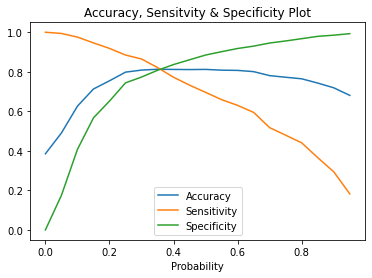

In [257]:
# Plotting accuracy sensitivity and specificity for all mentioned probabilities.

cutoff_df_3.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'], title = 'Accuracy, Sensitvity & Specificity Plot')
plt.show()

Inference: From above plot, ~0.35 is the optimal point to consider as cutoff probability

In [258]:
y_train_3_pred_final.head()

,Converted,Converted_Prob,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.094195,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.596414,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0
2,0,0.208370,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.748723,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
4,1,0.673721,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0


In [259]:
# Assigning lead score to y train 
y_train_3_pred_final['Lead Score'] = round(y_train_3_pred_final['Converted_Prob']*100, 2)

y_train_3_pred_final.head()

,Converted,Converted_Prob,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,Lead Score
0,0,0.094195,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.42
1,0,0.596414,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,59.64
2,0,0.208370,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,20.84
3,1,0.748723,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,74.87
4,1,0.673721,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,67.37


In [261]:
# Adding a column to y_train for final predicted value of response variable 'Converted' 
# based on probability cutoff of 0.35.
y_train_3_pred_final['final_predicted'] = y_train_3_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_3_pred_final.head(10)

,Converted,Converted_Prob,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,...,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,Lead Score,final_predicted
0,0,0.094195,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9.42,0
1,0,0.596414,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,59.64,1
2,0,0.208370,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,20.84,0
3,1,0.748723,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,74.87,1
4,1,0.673721,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,67.37,1
5,1,0.808986,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,80.90,1
6,0,0.043858,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.39,0
7,1,0.928503,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,92.85,1
8,1,0.900755,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,90.08,1
9,0,0.632712,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,63.27,1


In [289]:
# Forming y_train_final using only the required columns
y_train_final = y_train_3_pred_final[['Converted','Converted_Prob','final_predicted','Lead Score']]

y_train_final.head()

,Converted,Converted_Prob,final_predicted,Lead Score
0,0,0.094195,0,9.42
1,0,0.596414,1,59.64
2,0,0.208370,0,20.84
3,1,0.748723,1,74.87
4,1,0.673721,1,67.37


In [262]:
# Building confusion matrix based on final predicted 
confusion = metrics.confusion_matrix(y_train_3_pred_final.Converted, y_train_3_pred_final.final_predicted )
confusion

array([[3153,  752],
       [ 437, 2009]], dtype=int64)

In [263]:
# Calculating different metrics based on confusion matrix
# Let's check the overall accuracy.
Acc = round(metrics.accuracy_score(y_train_3_pred_final.Converted, y_train_3_pred_final.final_predicted),2)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Calculating Sensitivity / Recall
Sens = round((TP / float(TP+FN)),2)
Rec = round(metrics.recall_score(y_train_3_pred_final.Converted, y_train_3_pred_final.final_predicted),2)

#Calculating Specificity
Spec = round((TN / float(TN+FP)),2)

#Calculating Precision i.e Positive Predictive value
Prec = round(metrics.precision_score(y_train_3_pred_final.Converted, y_train_3_pred_final.final_predicted),2)

print("Metrics calculated for Train set based on prediction using Model 3")
print('Accuracy :',Acc,'\nSensitivity :',Sens,'\nSpecificity :',Spec,'\nPrecision :',Prec)

Metrics calculated for Train set based on prediction using Model 3
Accuracy : 0.81 
Sensitivity : 0.82 
Specificity : 0.81 
Precision : 0.73


We have obtained Accuracy, Sensitivity and Specificity as ~80% level with the cut-off value of 0.35.

Precision remains in the range of 73%

##### Plotting ROC Curve

In [264]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

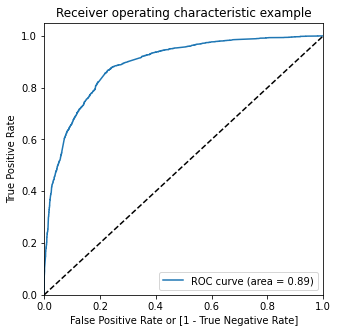

In [266]:
draw_roc(y_train_3_pred_final.Converted, y_train_3_pred_final.Converted_Prob)

For a good model, Area under ROC curve should be miximized. With the model we have obtained Area under ROC curve as 0.89

##### Plotting Recall and Precision

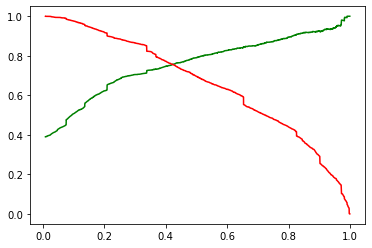

In [269]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_3_pred_final.Converted, y_train_3_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

plt.show()

Considering Precision and Recall curve, we get optimal cutoff at probability ~0.4. Precision and recall stats remain close to 0.75

##### Making Predictions on Test set

In [270]:
# Applying scaling on the test dataset. for scaling, min and max will be used as obtained on train dataset. 
# hence using only transform method for the test set

X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

# Retaining columns which are part of final model (model 3)
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Occupation_Unknown,Occupation_Working Professional,Last_Ntbl_Activity_Email Link Clicked,Last_Ntbl_Activity_Email Opened,Last_Ntbl_Activity_Modified,Last_Ntbl_Activity_Olark Chat Conversation,Last_Ntbl_Activity_Page Visited on Website
3271,0,0.070530,0,0,1,0,0,1,0,0,0
1490,0,0.679695,0,0,0,1,0,1,0,0,0
7936,0,0.033243,0,0,1,0,0,1,0,0,0
4216,0,0.000000,1,0,0,0,0,0,1,0,0
3830,0,0.073675,0,0,1,0,0,1,0,0,0


In [272]:
# Adding constant 
X_test_sm = sm.add_constant(X_test)

# Making prediction
y_test_pred = res3.predict(X_test_sm)

In [273]:
y_test_pred[:10]

3271    0.059340
1490    0.975161
7936    0.050395
4216    0.825925
3830    0.060159
1800    0.663154
6507    0.416473
4821    0.379063
4223    0.971391
4714    0.075081
dtype: float64

In [274]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

y_test_df.shape

(2723, 1)

In [278]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [281]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Converted,Converted_Prob
0,0,0.059340
1,1,0.975161
2,0,0.050395
3,1,0.825925
4,0,0.060159


In [282]:
# Adding prediced conversion 
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,0,0.059340,0
1,1,0.975161,1
2,0,0.050395,0
3,1,0.825925,1
4,0,0.060159,0


In [283]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1392,  342],
       [ 201,  788]], dtype=int64)

In [290]:
# Checking Metrics on the Predicted values on test set
# Let's check the overall accuracy.
Acc = round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2)

TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives


# Calculating Sensitivity / Recall
Sens = round((TP / float(TP+FN)),2)
Rec = round(metrics.recall_score(y_pred_final.Converted, y_pred_final.final_predicted),2)

#Calculating Specificity
Spec = round((TN / float(TN+FP)),2)

#Calculating Precision i.e Positive Predictive value
Prec = round(metrics.precision_score(y_pred_final.Converted, y_pred_final.final_predicted),2)

print('Metrics for Test set based on Model 3')
print('Accuracy :',Acc,'\nSensitivity / Recall :',Sens,'\nSpecificity :',Spec,'\nPrecision :',Prec)

Metrics for Test set based on Model 3
Accuracy : 0.8 
Sensitivity / Recall : 0.8 
Specificity : 0.8 
Precision : 0.7


We can see that, Metrics for the test set remain comparable with the stats calculated on train set.

In [ ]:
Assigning Lead Score

In [285]:
y_pred_final['Lead Score'] = round(y_pred_final['Converted_Prob']*100, 2)

In [291]:
y_pred_final.head()

,Converted,Converted_Prob,final_predicted,Lead Score
0,0,0.059340,0,5.93
1,1,0.975161,1,97.52
2,0,0.050395,0,5.04
3,1,0.825925,1,82.59
4,0,0.060159,0,6.02


In [292]:
y_train_final.head()

,Converted,Converted_Prob,final_predicted,Lead Score
0,0,0.094195,0,9.42
1,0,0.596414,1,59.64
2,0,0.208370,0,20.84
3,1,0.748723,1,74.87
4,1,0.673721,1,67.37


In [293]:
# Final dataset with lead score assigned to each lead number

Final_Lead = y_train_final.append(y_pred_final)

Final_Lead.shape

(9074, 4)

In [294]:
# Data frame with each lead assigned lead score
Final_Lead.head()

,Converted,Converted_Prob,final_predicted,Lead Score
0,0,0.094195,0,9.42
1,0,0.596414,1,59.64
2,0,0.208370,0,20.84
3,1,0.748723,1,74.87
4,1,0.673721,1,67.37


##### <B>Model Summary and Recommendation</B>

- Based on the data analysis and variour logistics regression model attempted we have finalised 3rd model. 
- Based on model prediction, optimal cut-off point is obtained at 0.35. At optimal cut-off point, model provides Accuracy, Sensitivity/Recall and Specificity in the range of ~80%.
- Precision of the model remains at 72% at optimal probability cutoff point of 0.35. From Precision-recall plot, we can see that based on precision-recall trade-off plot gives ~0.4 as probability cut-off point. at ~0.4, Precision and Recall remains at 74% and 77% for the model.

- It is observed that significant features obtained from the model are similar to those identified based on EDA (bi-variate analysis) performed during the case study.

<B>Based on the model following recommendations can be provided -<B>

- Company should focus on those customers who are spending more time on website.
- Particularly those customers who have filled the form should be identified as lead. And they are more likely to be converted as paying customers.
- Customers who are working professional are more likely to be converted.
- Customers who seems to be not serious and have not provided occupation information or they have opted not to receive any email, are less likely to be converted. So company should not be spending time for those leads.